# Segmentación de Clientes - Análisis Refinado

En este notebook trabajaremos con una base de datos de facturación (invoice data) que contiene información sobre ventas, clientes y transacciones. Nuestro objetivo es realizar una segmentación de clientes basada en sus características, pero con un enfoque depurado para evitar que las categorías queden demasiado amontonadas.

### Columnas principales:
- **invoice_no:** Número de factura
- **customer_id:** Identificador del cliente
- **gender:** Género
- **age:** Edad del cliente
- **category:** Categoría del producto (Clothing, Shoes, Books, etc.)
- **quantity:** Cantidad comprada
- **price:** Precio unitario
- **payment_method:** Método de pago (Credit Card, Debit Card, Cash, etc.)
- **invoice_date:** Fecha de la factura
- **shopping_mall:** Centro comercial donde se realizó la compra

### Objetivos del Taller:

1. Explorar, limpiar y entender la base de datos.
2. Crear variables derivadas (por ejemplo, el valor total de la compra).
3. Reducir la cantidad de categorías (por ejemplo, agrupar aquellas con muy pocos registros) para lograr un análisis más claro.
4. Definir criterios de segmentación demográfica y comportamental.
5. Visualizar los segmentos usando la paleta corporativa.
6. Formular preguntas específicas para discutir implicaciones de marketing.

### Paleta Corporativa a Utilizar:
- Azul: `#0033A0`
- Naranja: `#FF6600`
- Blanco: `#FFFFFF`

¡Sigan cada paso y al final discutan qué implicaciones de marketing se derivan de cada segmento!

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip

--2025-10-21 02:24:10--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip [following]
--2025-10-21 02:24:10--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/SegundoCorte/customer_shopping_data.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1712272 (1.6M) [application/zip]
Saving to: ‘customer_shopping_data.csv.zip’

cus

In [2]:
!unzip customer_shopping_data.csv.zip

Archive:  customer_shopping_data.csv.zip
  inflating: customer_shopping_data.csv  


In [3]:
# =============================================================================
# IMPORTS Y CONFIGURACIONES INICIALES
# =============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Paleta corporativa
corporate_colors = ['#0033A0', '#FF6600', '#FFFFFF']

# Ajuste de estética con Seaborn
sns.set(style="whitegrid")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=corporate_colors)

print("Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.")

Configuración inicial completa. Recuerden usar la paleta corporativa en sus gráficos.


## 1. Carga y Vista Rápida del Dataset

Carguen la base de datos denominada `customer_shopping_data.csv`. Observen las dimensiones y las primeras filas para familiarizarse con la estructura de los datos.

In [4]:
# =============================================================================
# 1. CARGA Y VISTA RÁPIDA DEL DATASET
# =============================================================================

df = pd.read_csv('customer_shopping_data.csv')

print("Dimensiones del DataFrame:")
print(df.shape)

print("\nVista rápida de los primeros registros:")
df.head()

Dimensiones del DataFrame:
(99457, 10)

Vista rápida de los primeros registros:


,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## 2. Análisis Exploratorio Inicial

Revisen la estructura, los tipos de datos y las estadísticas descriptivas del dataset.

**Pregunta para los estudiantes:** ¿Qué columnas consideran críticas para segmentar a los clientes y por qué?

In [5]:
print("Información general del DataFrame:")
df.info()
df.describe()


Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


Analizando la tabla, las columnas edad, precio y categoría son las que se consideran críticas para segmentar.

## 3. Limpieza de Datos

Identifiquen y gestionen valores nulos y duplicados. Es esencial dejar la base limpia para un análisis confiable.

**Pregunta:** ¿Qué variables presentan problemas de calidad de datos y cómo los resolverían?

In [6]:
df.isnull().sum()

,0
invoice_no,0
customer_id,0
gender,0
age,0
category,0
quantity,0
price,0
payment_method,0
invoice_date,0
shopping_mall,0


No hay variables nulas.

## 4. Creación de Variables Derivadas

Generen nuevas variables que puedan aportar a la segmentación. Por ejemplo, calculen el **valor total** de la factura (multiplicar `quantity` por `price`).

**Pregunta:** ¿Qué otras variables derivadas podrían ser útiles para analizar el comportamiento de compra?

In [7]:
totalPrice=df['quantity']*df['price']
df['total_value']=totalPrice
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40


In [ ]:
Haciendo el análisis nuevamente, otras variables que son útiles para analizar el comportamiento de compra son: edad y tipo de producto, edad y precio. edad y género

SyntaxError: invalid syntax (ipython-input-3187927985.py, line 1)

## 5. Visualización de Distribuciones

Visualicen la distribución de variables clave, como `age` y `total_value`, usando histogramas y boxplots. Usen la paleta corporativa en los gráficos.

**Pregunta:** ¿Detectan patrones o valores atípicos que requieran atención?

In [8]:
custome_palette = ['#0033A0', '#FF6600', '#FFFFFF']

Text(0.5, 1.0, 'Boxplot de Edad')

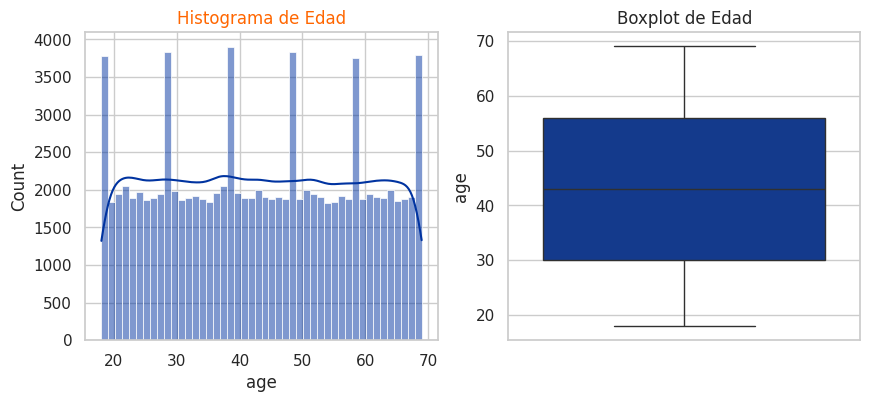

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['age'], kde=True)
plt.title(f'Histograma de Edad', color=custome_palette[1])

plt.subplot(1,2,2)
sns.boxplot(y=df['age'])
plt.title(f'Boxplot de Edad')

Text(0.5, 1.0, 'Boxplot de Valor Total')

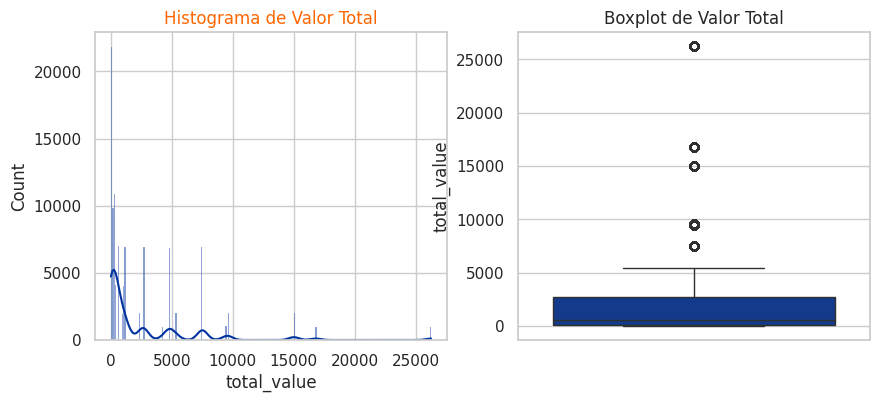

In [10]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(df['total_value'], kde=True)
plt.title(f'Histograma de Valor Total', color=custome_palette[1])

plt.subplot(1,2,2)
sns.boxplot(y=df['total_value'])
plt.title(f'Boxplot de Valor Total')

Analizando las tablas de edad y valor total, encontramos que, la edad es bastante equilibrada, que las personas compran por bajos costos, solo en algunos casos hacen compras de alto valor, la mediana se encuentra en las entre los 40 y 45 años. Por último, los datos están repartidos en todos los rangos de edad.

## 6. Definición de Criterios de Segmentación Demográfica

Segmenten a los clientes en función de variables demográficas, por ejemplo, agrupando la edad en categorías (Jóvenes, Adultos, Mayores) y analizando el género.

**Pregunta:** ¿Cómo segmentarían a los clientes en función de la edad y el género para dirigir campañas específicas?

In [11]:
bins_edad = [0, 30, 50, 100]
labels_edad = ['Joven', 'Adulto', 'Mayor']
df['Segmento_Edad'] = pd.cut(df['age'], bins=bins_edad, labels=labels_edad, right=False)
df["Segmento_Edad"].value_counts()

,count
Segmento_Edad,
Adulto,38440
Mayor,37974
Joven,23043


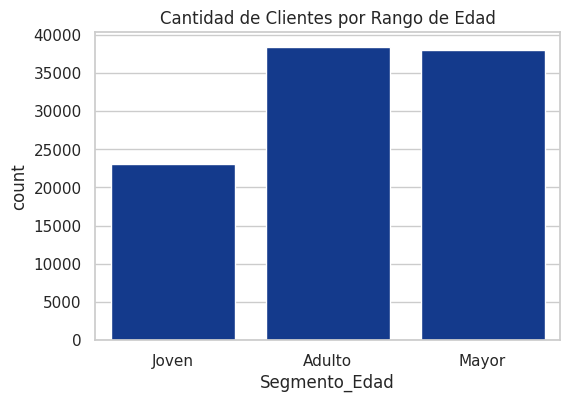

In [12]:
df["Segmento_Edad"].value_counts()
plt.figure(figsize=(6,4))
sns.countplot(x='Segmento_Edad', data=df)
plt.title('Cantidad de Clientes por Rango de Edad')
plt.show()
def asignar_segmento(row):
    return f"{row['Segmento_Edad']}_{row['gender']}"

In [13]:
df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Edad'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Edad', 'gender']
seg_counts

,Segmento_Edad,gender
0,Adulto,38440
1,Mayor,37974
2,Joven,23043


In [14]:
def asignar_segmento(row):
    return f"{row['Segmento_Edad']}_{row['gender']}"

df['Segmento_Edad'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Edad'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Edad', 'gender']
seg_counts

,Segmento_Edad,gender
0,Adulto_Female,23040
1,Mayor_Female,22715
2,Adulto_Male,15400
3,Mayor_Male,15259
4,Joven_Female,13727
5,Joven_Male,9316


## 7. Definición de Criterios de Segmentación Comportamental

Segmenten a los clientes según su comportamiento de compra. Revisen variables como `category`, `payment_method` y `shopping_mall`.

**Pregunta:** ¿Qué comportamiento de compra (categoría, método de pago, centro comercial) consideran de mayor impacto para la estrategia de marketing? ¿Por qué?

In [15]:
df.info()
df[['category','payment_method', 'shopping_mall']].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
 10  total_value     99457 non-null  float64
 11  Segmento_Edad   99457 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 9.1+ MB


,category,payment_method,shopping_mall
0,Clothing,Credit Card,Kanyon
1,Shoes,Debit Card,Forum Istanbul
2,Clothing,Cash,Metrocity
3,Shoes,Credit Card,Metropol AVM
4,Books,Cash,Kanyon


In [16]:
df['TotalPrice'] = df['quantity'] * df['price']
gasto_cliente = df.groupby('customer_id')['TotalPrice'].sum().reset_index()
gasto_cliente.head()

,customer_id,TotalPrice
0,C100004,7502.00
1,C100005,2400.68
2,C100006,322.56
3,C100012,130.75
4,C100019,35.84


In [17]:
gasto_cliente['Segmento_Gasto'] = pd.cut(
    gasto_cliente['TotalPrice'],
    bins=[-1, 200, 500, 2000, 10000],
    labels=['Gasto_Bajo', 'Gasto_Medio', 'Gasto_Alto', 'Cliente_Premium']
)

gasto_cliente.head()

,customer_id,TotalPrice,Segmento_Gasto
0,C100004,7502.00,Cliente_Premium
1,C100005,2400.68,Cliente_Premium
2,C100006,322.56,Gasto_Medio
3,C100012,130.75,Gasto_Bajo
4,C100019,35.84,Gasto_Bajo


In [18]:
df['TotalPrice'] = df['quantity'] * df['price']
gasto_cliente = df.groupby('customer_id')['TotalPrice'].sum().reset_index()
gasto_cliente.head()
gasto_cliente['Segmento_Gasto'] = pd.cut(
    gasto_cliente['TotalPrice'],
    bins=[-1, 200, 500, 2000, 50000],
    labels=['Gasto_Bajo', 'Gasto_Medio', 'Gasto_Alto', 'Cliente_Premium']
)

In [19]:
df_segmentado = pd.merge(df, gasto_cliente, on='customer_id')
df_segmentado.head()
df_segmentado.groupby('category')['TotalPrice_x'].mean().sort_values(ascending=False)

,TotalPrice_x
category,
Technology,11581.735388
Shoes,6632.793649
Clothing,3305.500364
Cosmetics,449.947864
Toys,394.609521
Books,167.547260
Souvenir,127.190368
Food & Beverage,57.494251


In [20]:
df_segmentado = pd.merge(df, gasto_cliente, on='customer_id')
df_segmentado.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,total_value,Segmento_Edad,TotalPrice_x,TotalPrice_y,Segmento_Gasto
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon,7502.00,Joven_Female,7502.00,7502.00,Cliente_Premium
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul,5401.53,Joven_Male,5401.53,5401.53,Cliente_Premium
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity,300.08,Joven_Male,300.08,300.08,Gasto_Medio
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM,15004.25,Mayor_Female,15004.25,15004.25,Cliente_Premium
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon,242.40,Mayor_Female,242.40,242.40,Gasto_Medio


In [21]:
df_segmentado.groupby('category')['Segmento_Gasto'].value_counts(normalize=True)

category         Segmento_Gasto 
Books            Gasto_Bajo         0.600883
                 Gasto_Medio        0.399117
                 Gasto_Alto         0.000000
                 Cliente_Premium    0.000000
Clothing         Cliente_Premium    0.600110
                 Gasto_Alto         0.201525
                 Gasto_Medio        0.198365
                 Gasto_Bajo         0.000000
Cosmetics        Gasto_Alto         0.401735
                 Gasto_Bajo         0.394780
                 Gasto_Medio        0.203484
                 Cliente_Premium    0.000000
Food & Beverage  Gasto_Bajo         1.000000
                 Gasto_Medio        0.000000
                 Gasto_Alto         0.000000
                 Cliente_Premium    0.000000
Shoes            Cliente_Premium    0.806259
                 Gasto_Alto         0.193741
                 Gasto_Bajo         0.000000
                 Gasto_Medio        0.000000
Souvenir         Gasto_Bajo         0.801560
                 Gasto_Medio        0.198440
                 Gasto_Alto         0.000000
                 Cliente_Premium    0.000000
Technology       Cliente_Premium    0.802842
                 Gasto_Alto         0.197158
                 Gasto_Bajo         0.000000
                 Gasto_Medio        0.000000
Toys             Gasto_Alto         0.401209
                 Gasto_Bajo         0.392386
                 Gasto_Medio        0.206404
                 Cliente_Premium    0.000000
Name: proportion, dtype: float64

In [22]:
df_segmentado.groupby('payment_method')['Segmento_Gasto'].value_counts(normalize=True)

payment_method  Segmento_Gasto 
Cash            Cliente_Premium    0.330528
                Gasto_Bajo         0.319212
                Gasto_Alto         0.201453
                Gasto_Medio        0.148806
Credit Card     Cliente_Premium    0.328705
                Gasto_Bajo         0.318084
                Gasto_Alto         0.201054
                Gasto_Medio        0.152157
Debit Card      Cliente_Premium    0.329897
                Gasto_Bajo         0.318492
                Gasto_Alto         0.199910
                Gasto_Medio        0.151701
Name: proportion, dtype: float64

## 8. Visualizaciones Comparativas de Segmentos

Crucen variables demográficas y comportamentales para identificar relaciones relevantes. Por ejemplo, comparen el grupo de edad con la categoría de producto.

**Pregunta:** ¿Qué relaciones entre estas variables podrían definir segmentos de alto valor?

In [23]:
df_segmentado.groupby(['Segmento_Edad', 'category'])['TotalPrice_x'].mean()

Segmento_Edad  category       
Adulto_Female  Books                168.945455
               Clothing            3259.346565
               Cosmetics            449.971442
               Food & Beverage       58.144129
               Shoes               6573.427161
               Souvenir             127.787287
               Technology         11648.771186
               Toys                 393.623133
Adulto_Male    Books                165.970449
               Clothing            3327.633299
               Cosmetics            458.970631
               Food & Beverage       57.304957
               Shoes               6740.639877
               Souvenir             125.713033
               Technology         11525.670732
               Toys                 386.402924
Joven_Female   Books                176.993008
               Clothing            3351.642597
               Cosmetics            453.869947
               Food & Beverage       56.760728
               Shoes               6661.930522
               Souvenir             130.795441
               Technology         11563.876652
               Toys                 401.905778
Joven_Male     Books                169.484909
               Clothing            3215.685833
               Cosmetics            436.063328
               Food & Beverage       57.418407
               Shoes               6895.411090
               Souvenir             129.030000
               Technology         10842.953020
               Toys                 393.091044
Mayor_Female   Books                162.696649
               Clothing            3322.794015
               Cosmetics            443.534091
               Food & Beverage       57.013189
               Shoes               6608.165490
               Souvenir             123.713742
               Technology         11651.250000
               Toys                 397.467299
Mayor_Male     Books                164.876341
               Clothing            3340.740109
               Cosmetics            454.916526
               Food & Beverage       58.120183
               Shoes               6461.830333
               Souvenir             128.762336
               Technology         11891.109626
               Toys                 394.073081
Name: TotalPrice_x, dtype: float64

In [26]:
 df_segmentado.groupby(['Segmento_Edad'])['category'].value_counts(normalize=True)

Segmento_Edad  category       
Adulto_Female  Clothing           0.348394
               Cosmetics          0.151649
               Food & Beverage    0.148958
               Toys               0.100868
               Shoes              0.099826
               Technology         0.051215
               Souvenir           0.050391
               Books              0.048698
Adulto_Male    Clothing           0.343052
               Cosmetics          0.153312
               Food & Beverage    0.150909
               Shoes              0.100260
               Toys               0.099481
               Technology         0.053247
               Souvenir           0.050519
               Books              0.049221
Joven_Female   Clothing           0.350113
               Cosmetics          0.151016
               Food & Beverage    0.145115
               Toys               0.104903
               Shoes              0.100459
               Souvenir           0.050339
               Technology         0.049610
               Books              0.048445
Joven_Male     Clothing           0.347467
               Food & Beverage    0.150923
               Cosmetics          0.143839
               Toys               0.103800
               Shoes              0.103371
               Books              0.053349
               Souvenir           0.049270
               Technology         0.047982
Mayor_Female   Clothing           0.344222
               Cosmetics          0.154215
               Food & Beverage    0.148800
               Toys               0.102179
               Shoes              0.100726
               Souvenir           0.051288
               Technology         0.049307
               Books              0.049263
Mayor_Male     Clothing           0.348319
               Cosmetics          0.152435
               Food & Beverage    0.146930
               Shoes              0.102235
               Toys               0.098499
               Books              0.053739
               Technology         0.049020
               Souvenir           0.048824
Name: proportion, dtype: float64

Tabla cruzada (Edad vs Categoria):
category       Books  Clothing  Cosmetics  Food & Beverage  Shoes  Souvenir  \
Segmento_Edad                                                                 
Adulto_Female   1122      8027       3494             3432   2300      1161   
Adulto_Male      758      5283       2361             2324   1544       778   
Joven_Female     665      4806       2073             1992   1379       691   
Joven_Male       497      3237       1340             1406    963       459   
Mayor_Female    1119      7819       3503             3380   2288      1165   
Mayor_Male       820      5315       2326             2242   1560       745   

category       Technology  Toys  
Segmento_Edad                    
Adulto_Female        1180  2324  
Adulto_Male           820  1532  
Joven_Female          681  1440  
Joven_Male            447   967  
Mayor_Female         1120  2321  
Mayor_Male            748  1503  


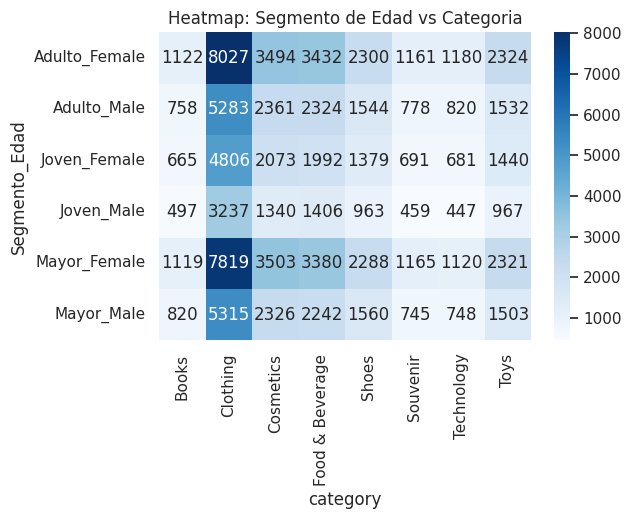

In [28]:
tabla_segmentos = pd.crosstab(df['Segmento_Edad'], df['category'])
print("Tabla cruzada (Edad vs Categoria):")
print(tabla_segmentos)

plt.figure(figsize=(6,4))
sns.heatmap(tabla_segmentos, annot=True, cmap='Blues', fmt='d')
plt.title('Heatmap: Segmento de Edad vs Categoria')
plt.show()

En general, en lo que más invierte cada género es en ropa. En lo que menos es en libros, tecnología y souvenir.

## 9. Reducción y Agrupación de Categorías

Si encuentran que hay demasiadas categorías o que algunas tienen muy pocos registros, agrupen aquellas que sean similares o con bajo volumen para evitar análisis amontonados.

**Ejemplo:** Si hay muchas categorías de tecnología o juguetes con pocos registros, podrían agruparlas en "Otros" o "Tecnología/Entretenimiento".

**Pregunta:** ¿Qué categorías agruparían y por qué?

In [34]:
mapping = {
    'Technology': 'Entretenimiento',
    'Toys': 'Entretenimiento',
    'Books': 'Entretenimiento',
}
df['category_mapped'] = df['category'].replace(mapping)

vc2 = df['category_mapped'].value_counts()
rare_after_map = vc2[vc2 / len(df) < 0.01].index.tolist()
df['category_final'] = df['category_mapped'].where(~df['category_mapped'].isin(rare_after_map), other='Other')

display(df['category'].value_counts().head(30))
display(df['category_final'].value_counts().head(30))

,count
category,
Clothing,34487
Cosmetics,15097
Food & Beverage,14776
Toys,10087
Shoes,10034
Souvenir,4999
Technology,4996
Books,4981


,count
category_final,
Clothing,34487
Entretenimiento,20064
Cosmetics,15097
Food & Beverage,14776
Shoes,10034
Souvenir,4999


Se agruparon, tecnología, libros y juguetes ya que coinciden con el mismo fin y tienen valores pequeños de consumo.

## 10. Creación de Segmentación Manual Combinada

Combinen criterios demográficos (por ejemplo, grupo de edad) y comportamentales (por ejemplo, categoría reducida y shopping mall) para formar un único segmento combinado.

**Pregunta:** ¿Qué combinación de variables creen que ofrece el perfil más completo para orientar estrategias de marketing?

In [35]:
def asignar_segmento(row):
    return f"{row['Segmento_Edad']}_{row['category_final']}"

df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts

,Segmento_Comb,Cantidad
0,Adulto_Female_Clothing,8027
1,Mayor_Female_Clothing,7819
2,Mayor_Male_Clothing,5315
3,Adulto_Male_Clothing,5283
4,Joven_Female_Clothing,4806
5,Adulto_Female_Entretenimiento,4626
6,Mayor_Female_Entretenimiento,4560
7,Mayor_Female_Cosmetics,3503
8,Adulto_Female_Cosmetics,3494
9,Adulto_Female_Food & Beverage,3432


In [36]:
def asignar_segmento(row):
    return f"{row['Segmento_Edad']}_{row['shopping_mall']}"

df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts

,Segmento_Comb,Cantidad
0,Adulto_Female_Kanyon,4637
1,Mayor_Female_Mall of Istanbul,4592
2,Adulto_Female_Mall of Istanbul,4560
3,Mayor_Female_Kanyon,4544
4,Mayor_Female_Metrocity,3431
5,Adulto_Female_Metrocity,3430
6,Adulto_Male_Mall of Istanbul,3109
7,Adulto_Male_Kanyon,3083
8,Mayor_Male_Mall of Istanbul,3035
9,Mayor_Male_Kanyon,3025


In [37]:
def asignar_segmento(row):
    return f"{row['category_final']}_{row['shopping_mall']}"

df['Segmento_Comb'] = df.apply(asignar_segmento, axis=1)
seg_counts = df['Segmento_Comb'].value_counts().reset_index()
seg_counts.columns = ['Segmento_Comb', 'Cantidad']
seg_counts

,Segmento_Comb,Cantidad
0,Clothing_Mall of Istanbul,6923
1,Clothing_Kanyon,6840
2,Clothing_Metrocity,5268
3,Entretenimiento_Mall of Istanbul,4042
4,Entretenimiento_Kanyon,3997
5,Clothing_Metropol AVM,3525
6,Clothing_Istinye Park,3353
7,Cosmetics_Mall of Istanbul,3050
8,Entretenimiento_Metrocity,3039
9,Cosmetics_Kanyon,3023


Las variables que nos brindan un perfil más completo son: Categoría y centro comercial y edad y categoría.

## 11. Análisis Final de los Grupos Resultantes

Analicen cómo se comportan los segmentos combinados en relación al **valor total de compra**. Identifiquen cuáles tienen un alto valor promedio y discutan sus implicaciones para la estrategia de marketing.

**Pregunta:** ¿Qué segmento destaca por tener un alto valor total y qué estrategias sugerirían para potenciarlo?

Analizando los datos recopilados, se puede concluir que el segmento que más destaca por tener un valor total alto es Cliente_premium.

Las estrategias que sugerimos para potencial a este tipo de cliente son:

- Webinars, lanzamientos exclusivos, acceso a colecciones limitadas. Aumenta la fidelidad y justifica precios premium.
- Crear niveles como Silver / Gold con beneficios: envíos gratuitos, accesos anticipados, descuentos exclusivos y atención prioritaria.
- Darles experiencias, es decir, que puedan participar para asistir a eventos importantes de la empresa, como fiestas, impulsos de marca, para hacer relaciones públicas solo por ser clientes premium y que puedan ir como representacipon de la marca (ejemplo: vestidos y asesorados completamente por la empresa)




## 12. Recomendaciones de Marketing

Con base en el análisis de los segmentos, respondan las siguientes preguntas:

- ¿Qué segmentos tienen mayor potencial en términos de valor y frecuencia de compra?
- ¿Qué estrategias de marketing implementarían para segmentos con bajo valor promedio?
- ¿Cómo influye la categoría de producto (tras la reducción) y el centro comercial en el comportamiento de compra?

Escriban sus respuestas en una celda Markdown o en un documento complementario, justificando cada estrategia.

- Los segmentos con mayor potencial son aquellos formados por personas entre los 40 y 45 años, ya que concentran la mediana de valor de compra, y además presentan un comportamiento equilibrado en frecuencia.
En cuanto a categorías, la ropa es la de mayor inversión y frecuencia de compra, en ambos géneros. El segmento con más potencial combina:

Edad: 40 a 45 años

Categoría: Ropa

Frecuencia de compra: Media a alta

Centro comercial: Kanyon y Metropol AVM (con mayor tráfico y ticket promedio)

- Promociones combinadas o “bundle offers” que unan estas categorías con productos de mayor rotación (por ejemplo: libro + accesorio o souvenir + prenda).

Descuentos por segunda unidad o beneficios por compras repetidas.

Experiencias en punto de venta (por ejemplo, espacios tecnológicos o culturales) para aumentar el tiempo de permanencia y la probabilidad de compra.
Estas acciones buscan aumentar el ticket promedio y transformar las compras ocasionales en consumo habitual.

- La categoría de producto influye directamente en el monto gastado y la frecuencia:

Ropa: Alta frecuencia y valor medio-alto.

Zapatos: Frecuencia media, pero alto valor unitario.

Libros, tecnología y juguetes: Bajo valor y menor frecuencia.

El centro comercial también determina el comportamiento de compra.

Centros como Kanyon y Metropol AVM atraen compradores con mayor poder adquisitivo y preferencia por categorías de moda.

En contraste, Forum Istanbul y Metrocity tienen un público más diverso y sensible al precio, con mayor presencia en compras pequeñas o de impulso.

Esto nos hace ver que las estrategias deben adaptarse al perfil del centro comercial, priorizando campañas de experiencia de marca y fidelización en los centros premium, y promociones y descuentos en los de mayor flujo masivo.


## 13. Toma de Decisiones y Conclusiones

Finalmente, el equipo de marketing debe decidir:

- ¿Cuántos segmentos son óptimos para la estrategia de la empresa?
- ¿Cómo asignar el presupuesto de marketing entre estos segmentos?
- ¿Qué indicadores se utilizarán para medir el éxito de las campañas en cada segmento?

**Actividad Final:**

1. Seleccionen el segmento con mayor potencial en términos de valor y frecuencia de compra.
2. Propongan una estrategia específica (campañas, promociones, ofertas personalizadas) para ese segmento.
3. Justifiquen su elección y expliquen cómo monitorizarán el desempeño de la campaña.

¡Discútanlo en grupo y compartan sus conclusiones!

- Centro Comercial, método de pago y categoría.
- El presupuesto debería repartirse según la importancia y el potencial de cada grupo. De esta forma, se cuida a los clientes más rentables, se impulsa a los que pueden crecer y se mantiene una base amplia de consumidores activos.
-
Valor del cliente, para analizar cuánto dinero aporta cada cliente a lo largo del tiempo.

Frecuencia de compra, cuántas veces compra cada segmento en un periodo.

Tasa de retención, cuántos clientes se mantienen fieles a la marca.

Participación en eventos o webinars para medir el nivel de conexión con la marca.

Satisfacción del cliente y qué tanto recomiendan la marca a otros.

Esto nos permite ajustar las estrategias y así mismo nos podemos asegurar de que cada segmento esté generando los resultados esperados.


1. Edad-género y Clientes con mayor capacidad de pago. Con este, pudimos empezar a desglosar más los datos y nos permitió adquirir más información que nos ayudara a clasificar y pensar en nuevas estrategias.

2.Implementar un programa de fidelización como un “Club Premium”, con
Campañas exclusivas, lanzamientos anticipados de nuevas colecciones, acceso prioritario a productos de edición limitada y eventos privados de moda o networking. Descuentos especiales según el historial de compras y fechas relevantes.
Beneficios como envío gratuito, atención prioritaria y la posibilidad de asistir a eventos de la marca como representante (vestidos y asesorados por la empresa).
correos electrónicos y mensajes personalizados que refuercen el vínculo emocional con la marca.

3. Elegimos este segmento ya que combina alto valor de compra, frecuencia y afinidad emocional con la marca, con el fin de que una buena estrategia pueda generar mayor rentabilidad con menor esfuerzo publicitario.
Al fortalecer su fidelidad y ofrecerles experiencias únicas, se fomenta que actúen como embajadores de la marca y así ser referentes para que otras personas quieran usarla.

Podemos monitorizar el desempeño de la campaña, con los siguientes indicadores:
Porcentaje de clientes premium que repiten compras después de la campaña, frecuencia de compra, cuánto gasta cada cliente en cada transacción, claramente la participación en eventos o programas del Club Premium para medir el nivel de compromiso con la marca y retorno de inversión.
